# 1. 데이터 탐색

## 1-1. 데이터 가져오기

In [94]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

print(train.shape, test.shape)

(15035, 21) (6468, 20)


## 1-2. 피쳐 확인

* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : 집이 얼마나 좋아 보이는지의 정도
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

In [84]:
# 자료형 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

## 1-3. Target Variable 확인

In [70]:
# 기초 통계량 확인

train['price'].describe()

count    1.503500e+04
mean     5.406827e+05
std      3.715247e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

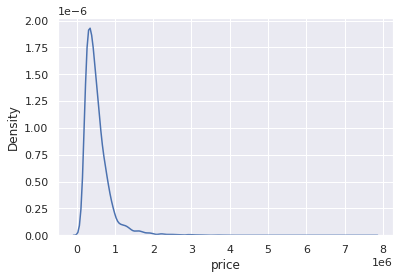

In [71]:
# 분포도 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(train['price'])
plt.show()

In [72]:
# Skewness and Kurtosis 확인

print(f'Skewness: {train["price"].skew()}')
print(f'Kurtosis: {train["price"].kurt()}')

Skewness: 4.290252396939529
Kurtosis: 40.15491919350329


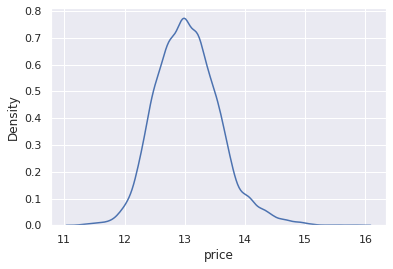

In [95]:
# 회귀 모델을 사용할것이기 때문에 타겟이 정규 분포를 가지도록 로그변환을 해준다
import numpy as np

train['price'] = np.log1p(train['price'])

sns.kdeplot(train['price'])
plt.show()

## 1-4. 데이터 시각화

* Target과 상관관계 확인

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


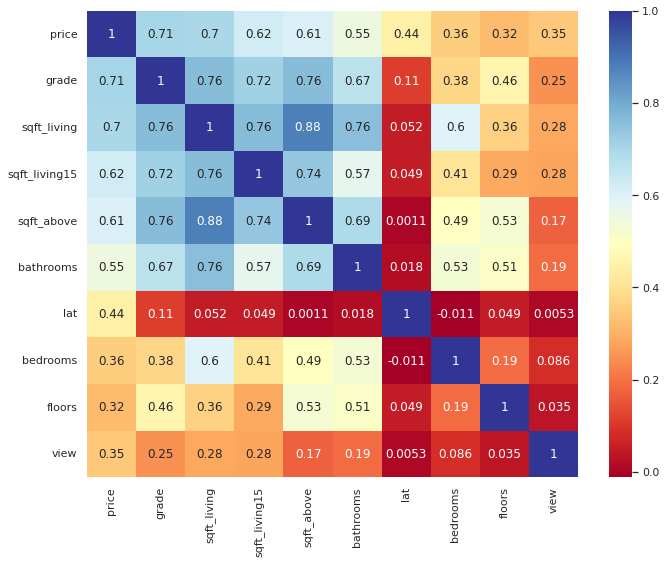

In [74]:
fig = plt.figure(figsize = (10, 8))
ax = fig.gca()

cor_abs = abs(train.corr(method='spearman')) 
# target variable과 상관관계가 높은 10개 찾음
cor_cols = cor_abs.nlargest(n=10, columns='price').index
columns = cor_cols.values

print(columns)

sns.set()
corr = train[columns].corr(method='pearson')
heatmap = sns.heatmap(corr, annot=True,
                      yticklabels=columns, 
                      xticklabels=columns,
                      ax=ax, cmap="RdYlBu")
plt.tight_layout()
plt.show()

> 가격과 관련있는 피쳐는 집의 등급 > 집의 넓이 > 위치 인거같음

* 피쳐들의 분포 확인

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


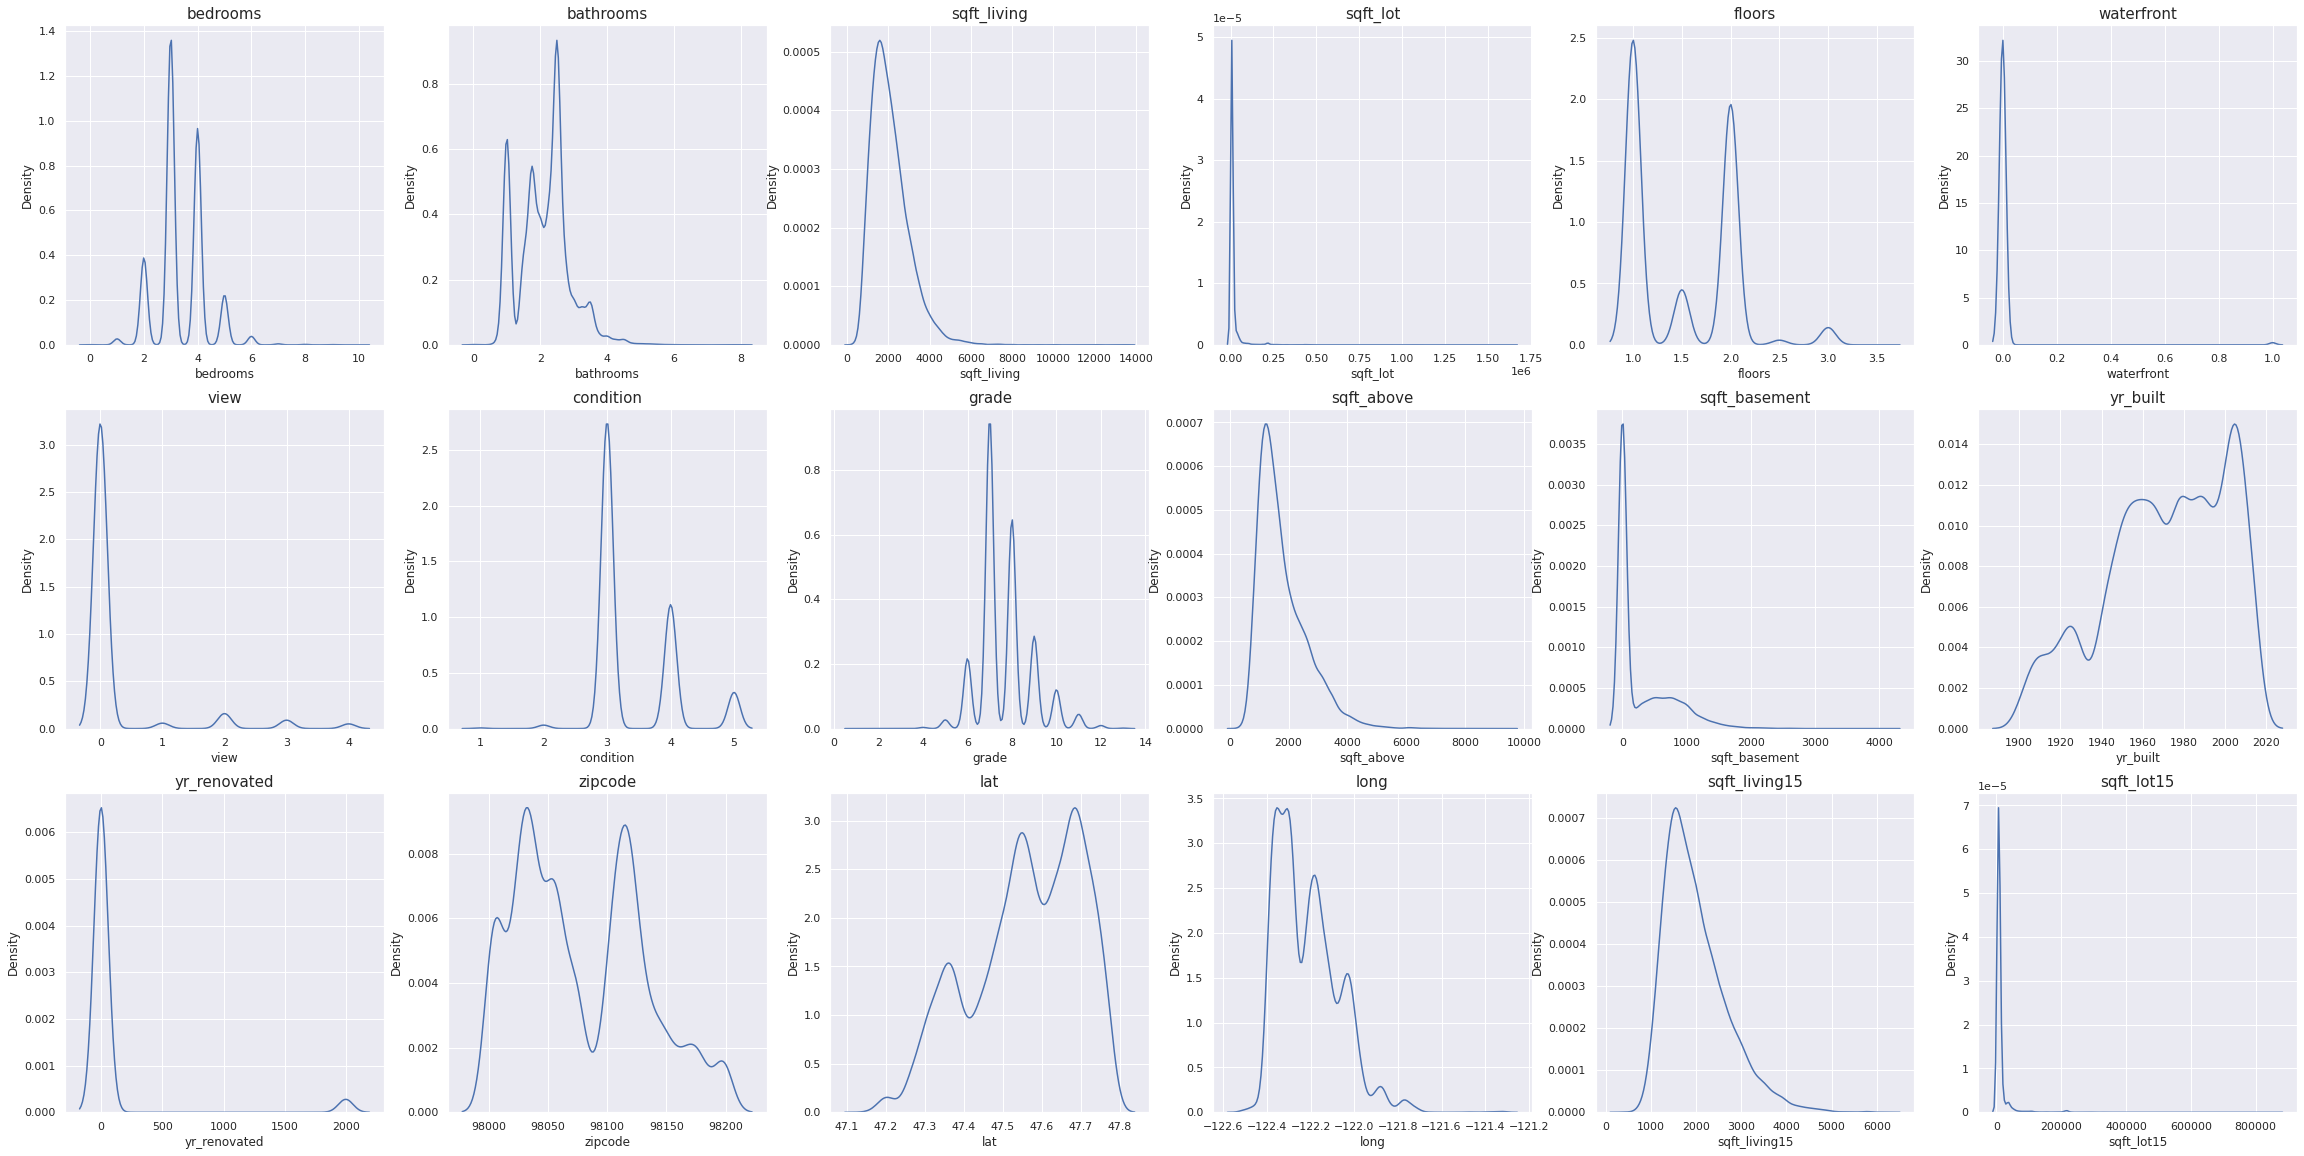

In [75]:
fig, ax = plt.subplots(3, 6, figsize=(40, 20))

# id 변수는 제외하고 분포를 확인합니다.
count = 0
columns = train.columns[3:]
print(columns)

count = 0
for row in range(3):
    for col in range(6):
        sns.kdeplot(train[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1

> 한쪽으로 치우쳐져 있는 피쳐인 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'는 정규화 필요

## 1-5. 결측치

In [87]:
# 결측치가 있는 컬럼이 있으면 표시함

for c in train.columns:
    check_null = len(train.loc[pd.isnull(train[c]), c].values)
    if check_null != 0:
        print(f'c - {check_null}')

# 2. 데이터 전처리

## 2-1. 정규화

In [96]:
# 로그변환
n_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in n_columns:
    train[c] = np.log1p(train[c].values)
    test[c] = np.log1p(test[c].values)

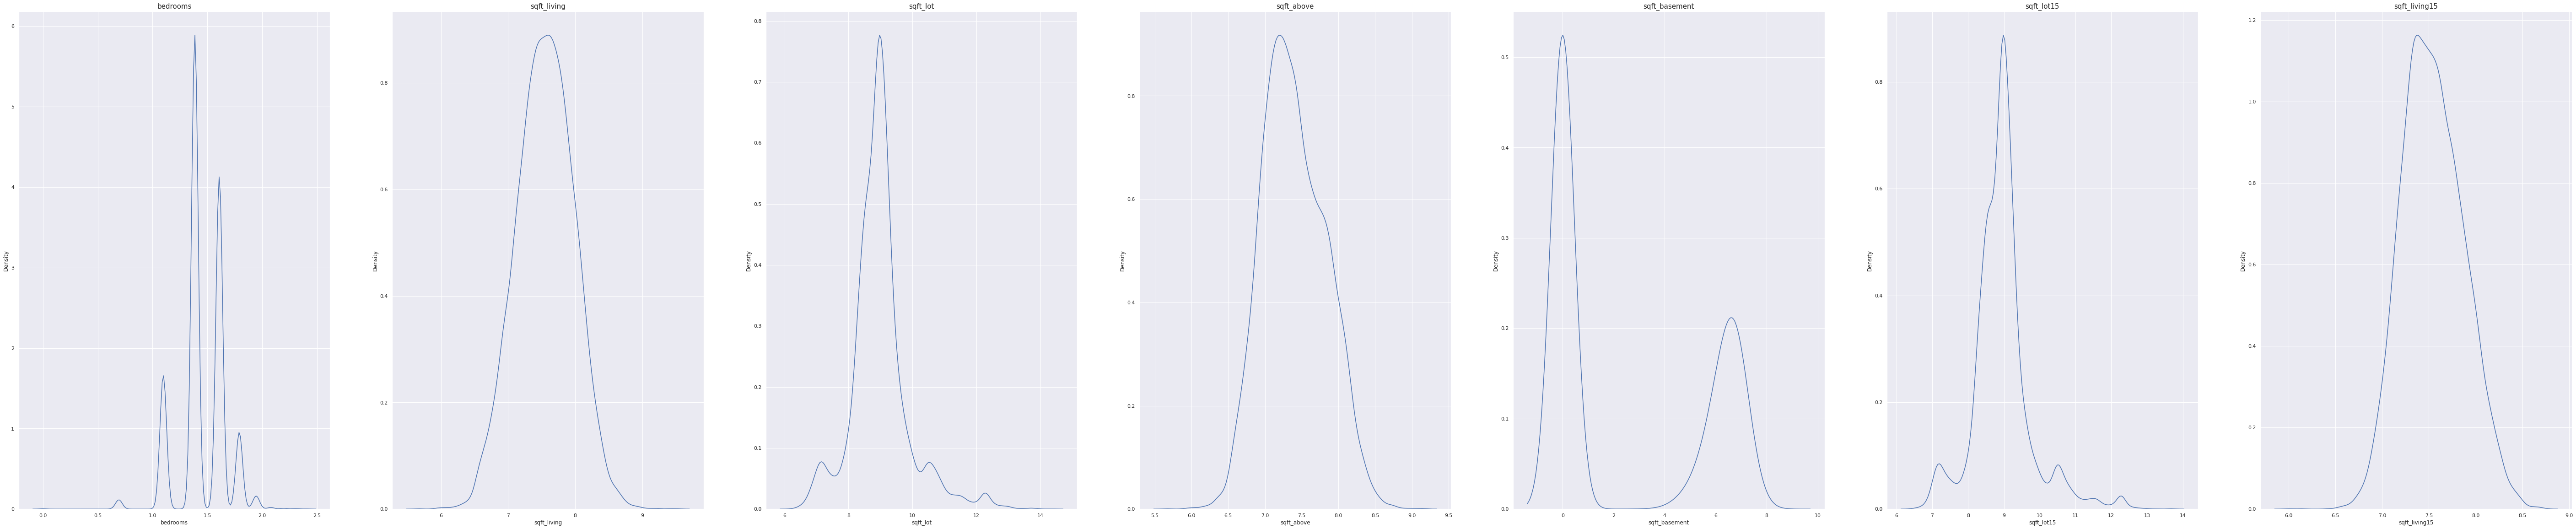

In [78]:
fig, ax = plt.subplots(1, 7, figsize=(100, 20))

for i in range(7):
    sns.kdeplot(train[n_columns[i]], ax=ax[i])
    ax[i].set_title(n_columns[i], fontsize=15)

## 2-2. 피쳐 변경 및 추가적인 피쳐 생성

* date => int형으로 변경
* is_renovated => yr_renovated로 boolean값 생성
* total_rooms (방 전체 갯수) => bedrooms + bathrooms
* sqft_total (전체 크기) => sqft_above + sqft_basement
* mean_sqft_per_price (zipcode로 분류해서 평균 가격을 구함)

In [97]:
for df in [train, test]:
    df['date'] = df['date'].apply(lambda i: i[:6]).astype(int)
    df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    
train['per_price'] = train['price'] / train['sqft_total_size']
zipcode_price = train.groupby(['zipcode'])['per_price'].agg({ 'mean' }).reset_index()

train = pd.merge(train, zipcode_price, how='left', on='zipcode')
test = pd.merge(test, zipcode_price, how='left', on='zipcode')

for df in [train, test]:
    df['mean_sqft_per_price'] = df['mean'] * df['sqft_total_size']

In [98]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,is_renovated,total_rooms,sqft_total_size,per_price,mean,mean_sqft_per_price
0,0,201410,12.309987,1.386294,1.00,7.074117,8.639588,1.0,0,0,...,47.5112,-122.257,7.201171,8.639588,0,2.386294,7.074117,1.740145,1.324285,9.368147
1,1,201502,12.100718,1.098612,1.00,6.647688,9.210440,1.0,0,0,...,47.7379,-122.233,7.908755,8.995041,0,2.098612,6.647688,1.820290,1.392626,9.257745
2,2,201502,13.142168,1.386294,2.00,7.427144,8.997271,1.0,0,0,...,47.6168,-122.045,7.496097,8.923191,0,3.386294,7.427144,1.769478,1.522484,11.307711
3,3,201406,12.458779,1.386294,2.25,7.447751,8.827615,2.0,0,0,...,47.3097,-122.327,7.713785,8.827615,0,3.636294,7.447751,1.672824,1.426763,10.626177
4,4,201501,12.583999,1.386294,1.50,6.966967,9.181118,1.0,0,0,...,47.4095,-122.315,7.409136,9.181118,0,2.886294,6.966967,1.806238,1.439939,10.032009


## 2-3. Target Variable 분리 및 필요없는 컬럼 삭제

In [99]:
# 타겟 데이터 분리 및 필요없는 컬럼 삭제

y = train['price']

for df in [train, test]:
    del df['id']
    del df['mean']

del train['price']
del train['per_price']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'is_renovated', 'total_rooms',
       'sqft_total_size', 'mean_sqft_per_price'],
      dtype='object')


# 3. 모델링

## 3-1. RMSE

In [100]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
    return np.sqrt(
        mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

## 3-2. 모델 초기화

In [102]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

## 3-3. 기본 점수 확인

In [105]:
from sklearn.model_selection import train_test_split

def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128163.714604
RandomForestRegressor,126452.488536
XGBRegressor,113114.152800
LGBMRegressor,110421.033083


## 3-4. try 1: Grid Search

In [107]:
from sklearn.model_selection import GridSearchCV

def get_gs_result(
    model, train, y, param_grid={'n_estimators': [50, 100], 'max_depth': [1, 10] }, verbose=2, n_jobs=5):
    
    grid_model = GridSearchCV(
        model, param_grid=param_grid, 
        scoring='neg_mean_squared_error', 
        cv=5, verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [109]:
# LGBMRegressor Model
get_gs_result(
    LGBMRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027156,0.164790
2,10,50,-0.029223,0.170948
1,1,100,-0.055006,0.234533
0,1,50,-0.073360,0.270850


In [110]:
# XGBRegressor Model
get_gs_result(
    XGBRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warni

,max_depth,n_estimators,score,RMSLE
2,10,50,-0.030342,0.174191
3,10,100,-0.030457,0.174518
1,1,100,-0.043048,0.207479
0,1,50,-0.048813,0.220937


In [111]:
# RandomForestRegressor Model
get_gs_result(
    RandomForestRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.035309,0.187907
2,10,50,-0.035499,0.188411
1,1,100,-0.179128,0.423235
0,1,50,-0.179746,0.423965


In [112]:
# GradientBoostingRegressor Model
get_gs_result(
    GradientBoostingRegressor(random_state=random_state), train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.029922,0.172981
2,10,50,-0.030278,0.174006
1,1,100,-0.055066,0.234662
0,1,50,-0.073326,0.270788


[CV] END .......................max_depth=1, n_estimators=50; total time=   0.6s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=   1.5s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.7s
[CV] END .......................max_depth=1, n_estimators=50; total time=   6.7s
[CV] END ......................max_depth=1, n_estimators=100; total time=   8.9s
[CV] END ......................max_depth=10, n_estimators=50; total time=  56.0s
[CV] END .....................max_depth=10, n_estimators=100; total time= 1.8min
[CV] END .......................max_depth=1, n_estimators=50; total time=   2.9s
[CV] END ......................max_depth=1, n_estimators=100; total time=   5.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=  22.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=  39.4s
[CV] END ...................

In [113]:
gboost = GradientBoostingRegressor(max_depth=10, n_estimators=100, random_state=random_state)
xgboost = XGBRegressor(max_depth=10, n_estimators=50, random_state=random_state)
lightgbm = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
rdforest = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [114]:
get_scores(models, train, y)

,RMSE
RandomForestRegressor,131961.109277
GradientBoostingRegressor,117914.827321
XGBRegressor,115958.574769
LGBMRegressor,111354.180770


## 3-5. Try 2: Stacking Modeling

In [132]:
from sklearn.ensemble import StackingRegressor

def get_stacking_model():
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    gboost = GradientBoostingRegressor(random_state=random_state)
    xgboost = XGBRegressor(random_state=random_state)
    lightgbm = LGBMRegressor(random_state=random_state)
    rdforest = RandomForestRegressor(random_state=random_state)

    stack_models = [
        ('gb', gboost),
        ('xgb', xgboost),
        ('lgbm', lightgbm),
        ('rf', rdforest)
    ]
    
    stack_reg = StackingRegressor(stack_models, final_estimator=gboost)
    stack_reg.fit(X_train, y_train)
    
    y_pred = stack_reg.predict(X_test)
    print(f'rmse: {rmse(y_pred, y_test)}')
    
    return stack_reg

s_model = get_stacking_model()

rmse: 109513.77610982273


# 4. submission

In [133]:
def save_submission(model):
    prediction = model.predict(test)
    prediction = np.expm1(prediction)

    submission = pd.read_csv('./data/sample_submission.csv')
    submission['price'] = prediction    
    submission.to_csv('./data/submission.csv', index=False)
    
    print('saved!')

In [129]:
save_submission(s_model)

saved!
